In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [119]:
df=pd.read_csv('/kaggle/input/crop-yield-in-indian-states-dataset/crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [120]:
df.shape

(19689, 10)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [122]:
df['Total_Yield']=df['Area']*df['Production']
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Total_Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,4.185844e+09
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,3.109434e+07
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,1.751200e+04
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,2.494445e+12
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,1.380766e+06


In [123]:
df.duplicated().sum()

0

In [124]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
Total_Yield        0
dtype: int64

In [125]:
df.nunique()

Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
Total_Yield        18578
dtype: int64

In [126]:
df['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [127]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield', 'Total_Yield'],
      dtype='object')

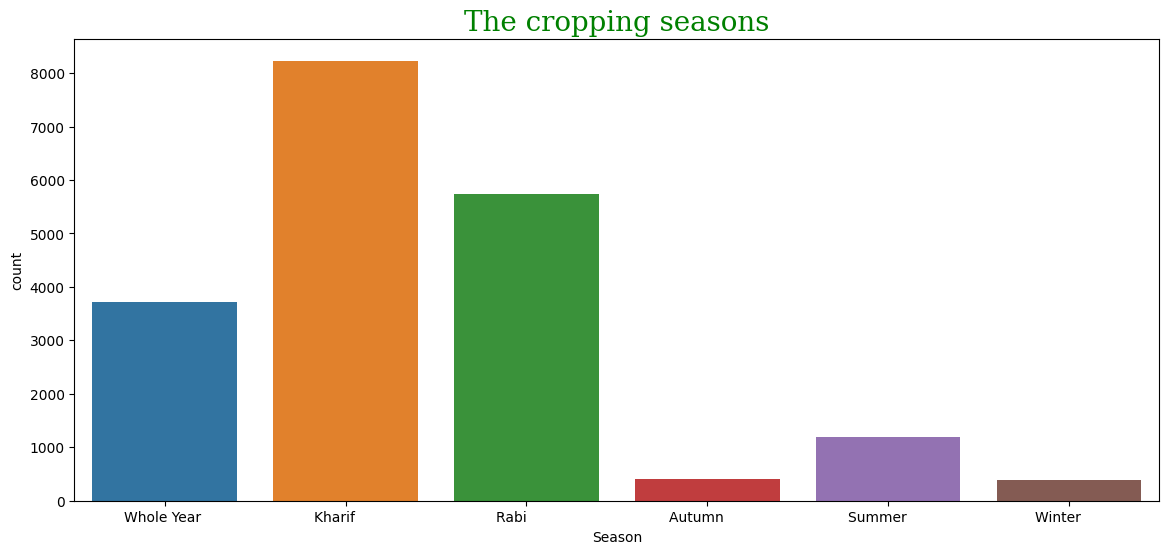

In [128]:

plt.figure(figsize=(14,6))
sns.countplot(x='Season',data=df)
plt.title("The cropping seasons",fontsize=20,color='green',fontfamily='serif')
plt.show()

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.0,2.009128e+03,6.498099e+00,1997.00,2004.00,2.010000e+03,2.015000e+03,2.020000e+03
Area,19689.0,1.799266e+05,7.328287e+05,0.50,1390.00,9.317000e+03,7.511200e+04,5.080810e+07
Production,19689.0,1.643594e+07,2.630568e+08,0.00,1393.00,1.380400e+04,1.227180e+05,6.326000e+09
Annual_Rainfall,19689.0,1.437755e+03,8.169096e+02,301.30,940.70,1.247600e+03,1.643700e+03,6.552700e+03
Fertilizer,19689.0,2.410331e+07,9.494600e+07,54.17,188014.62,1.234957e+06,1.000385e+07,4.835407e+09
Pesticide,19689.0,4.884835e+04,2.132874e+05,0.09,356.70,2.421900e+03,2.004170e+04,1.575051e+07
Yield,19689.0,7.995401e+01,8.783062e+02,0.00,0.60,1.030000e+00,2.388889e+00,2.110500e+04
Total_Yield,19689.0,1.017456e+13,1.795959e+14,0.00,2234920.00,1.201828e+08,8.195146e+09,5.679692e+15


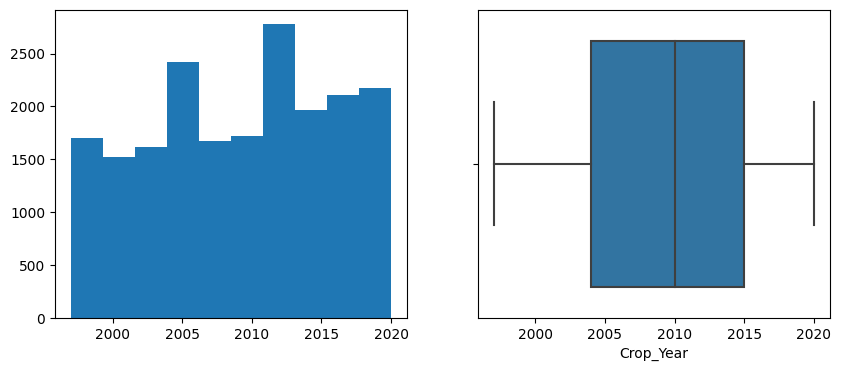

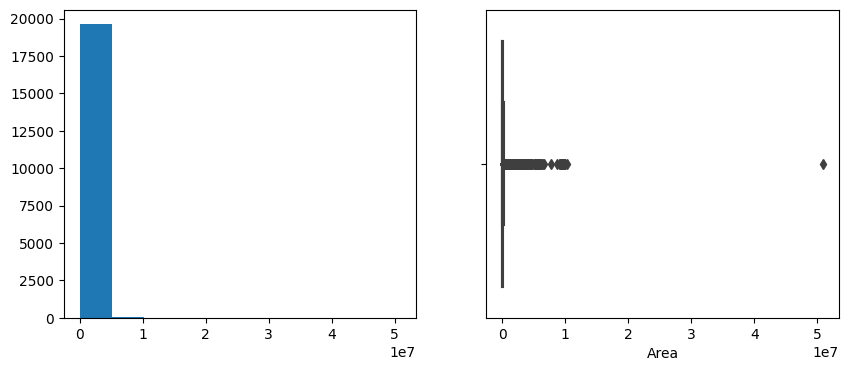

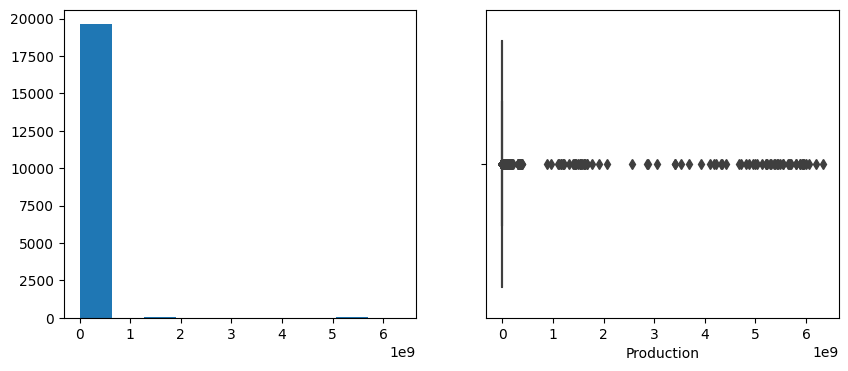

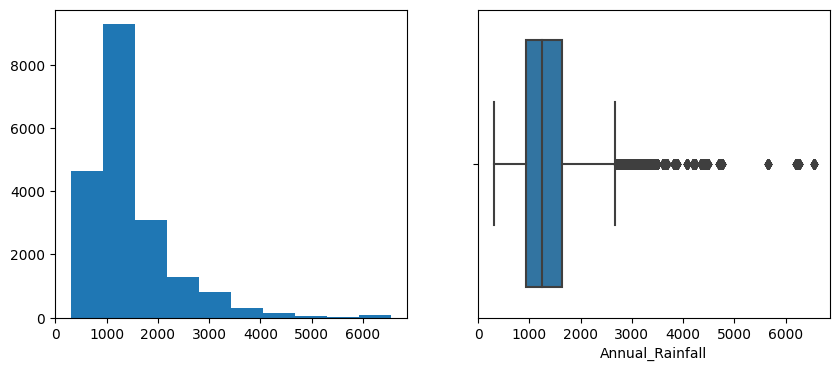

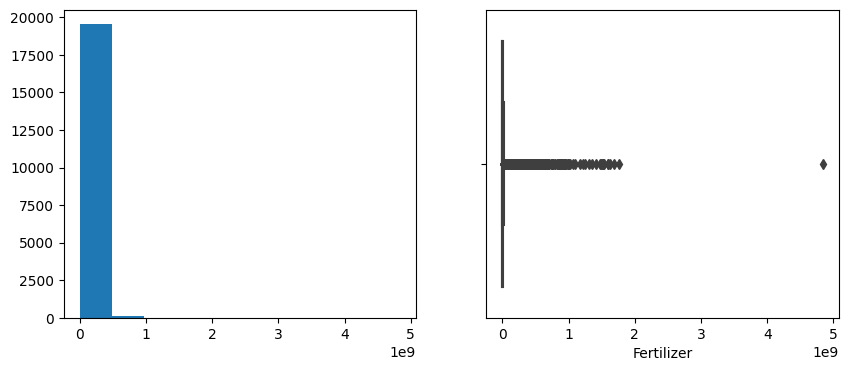

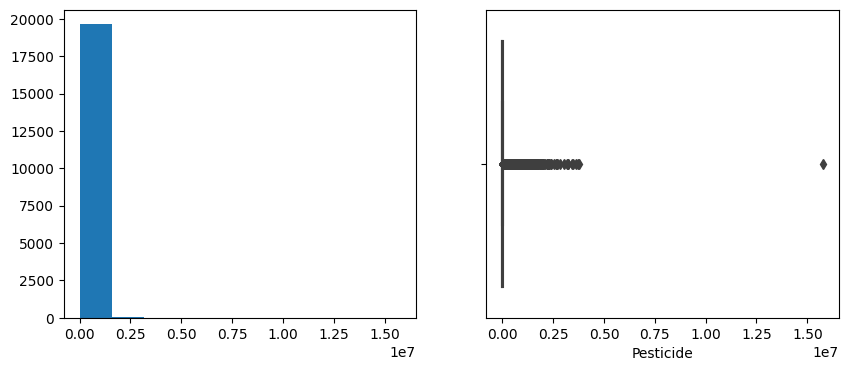

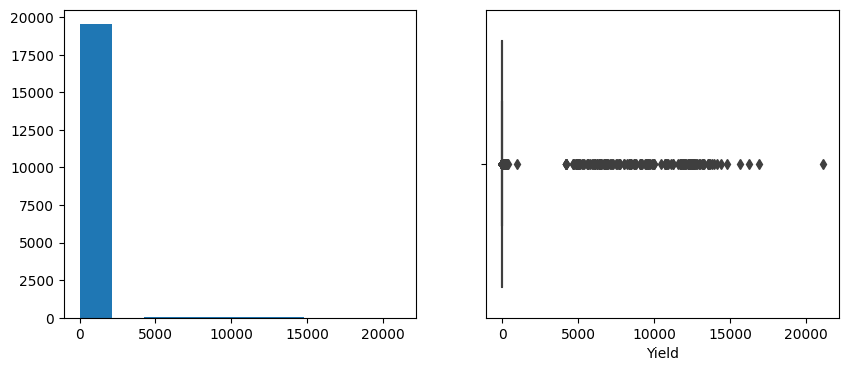

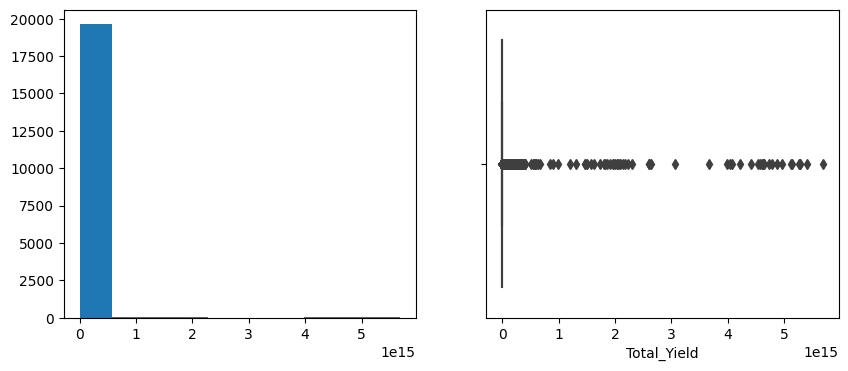

In [130]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(x=col,data=df)
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.show()

# **TOP 10 CROPS IN INDIA:**

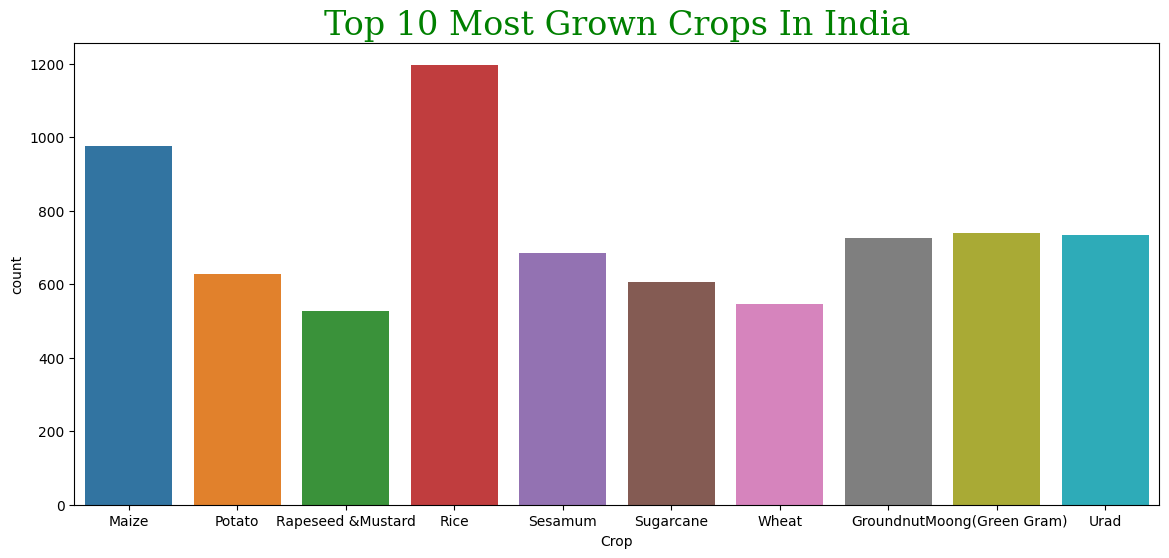

In [131]:
top10=df['Crop'].value_counts().index[:10]
Content=df.loc[df['Crop'].isin(top10)]
plt.figure(figsize=(14,6))
sns.countplot(x='Crop',data=Content)
plt.title("Top 10 Most Grown Crops In India",fontsize=24,color='green',fontfamily='serif')
plt.show()



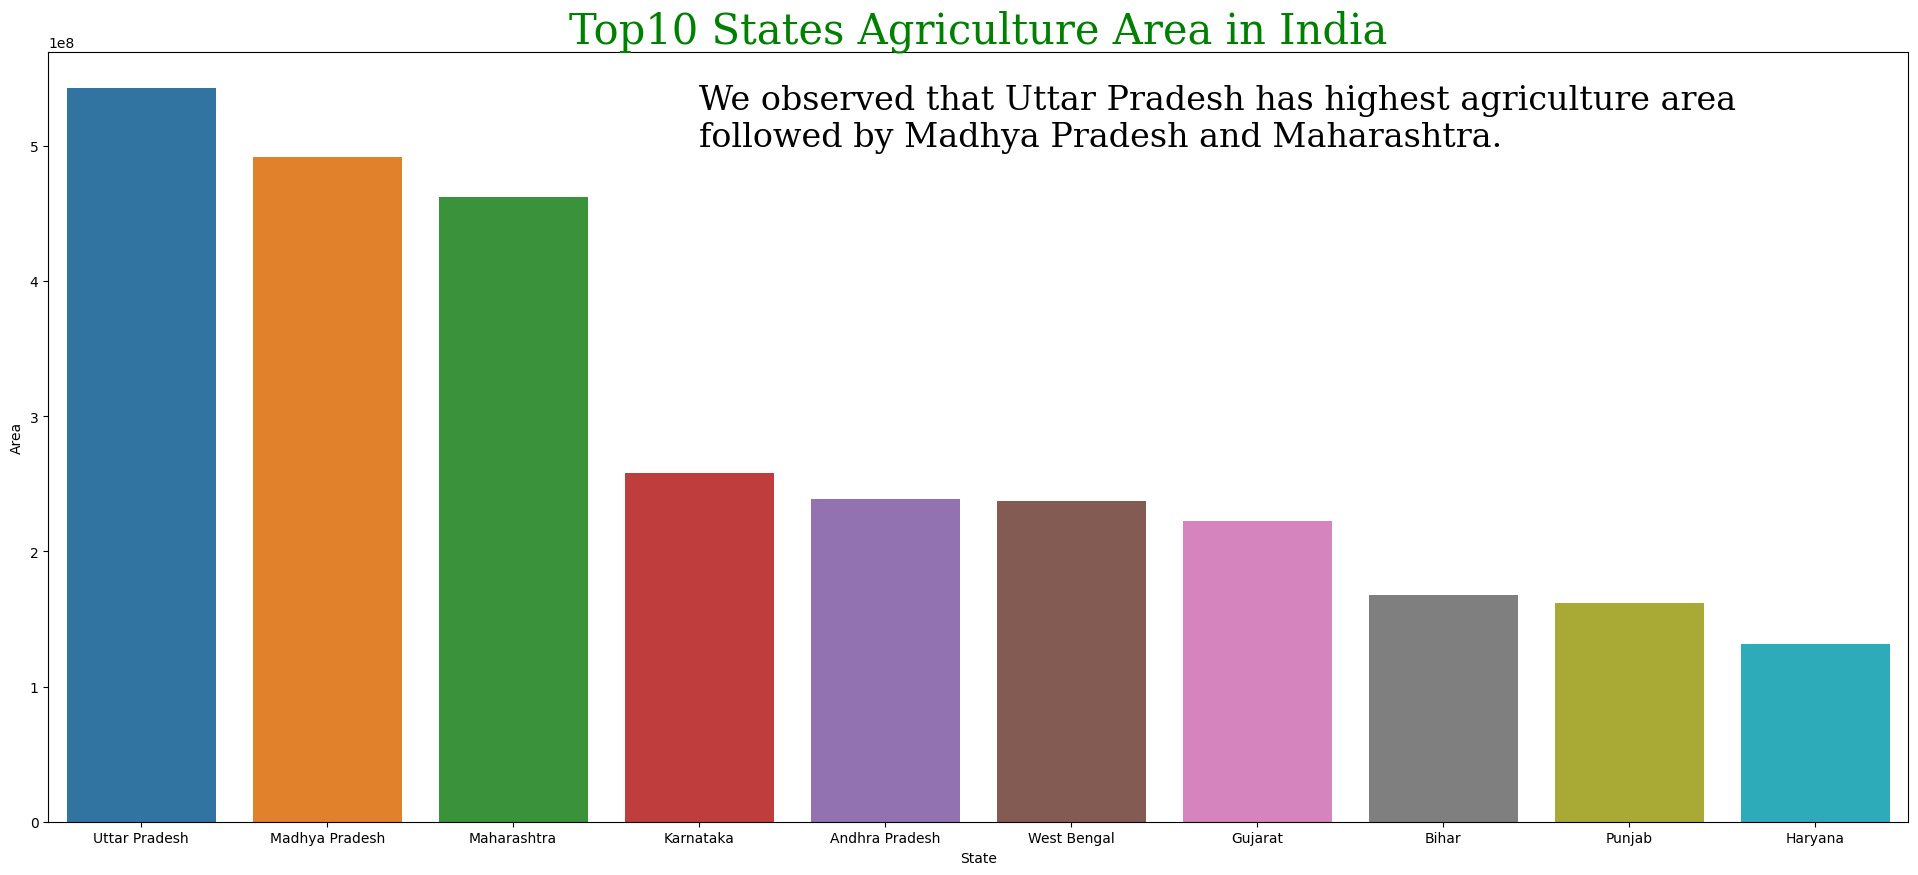

In [132]:
a=df.groupby('State')['Area'].sum().reset_index()
Top10=a['Area'].sort_values(ascending=False).index[:10]
df_s=a.loc[Top10]
plt.figure(figsize=(24,10))
plt.title("Top10 States Agriculture Area in India",color='green',fontsize=30,fontfamily='serif')
sns.barplot(x='State',y='Area',data=df_s)
plt.text(3,500000000,'''We observed that Uttar Pradesh has highest agriculture area
followed by Madhya Pradesh and Maharashtra.''',fontsize=24, fontweight='light', fontfamily='serif')
plt.show()



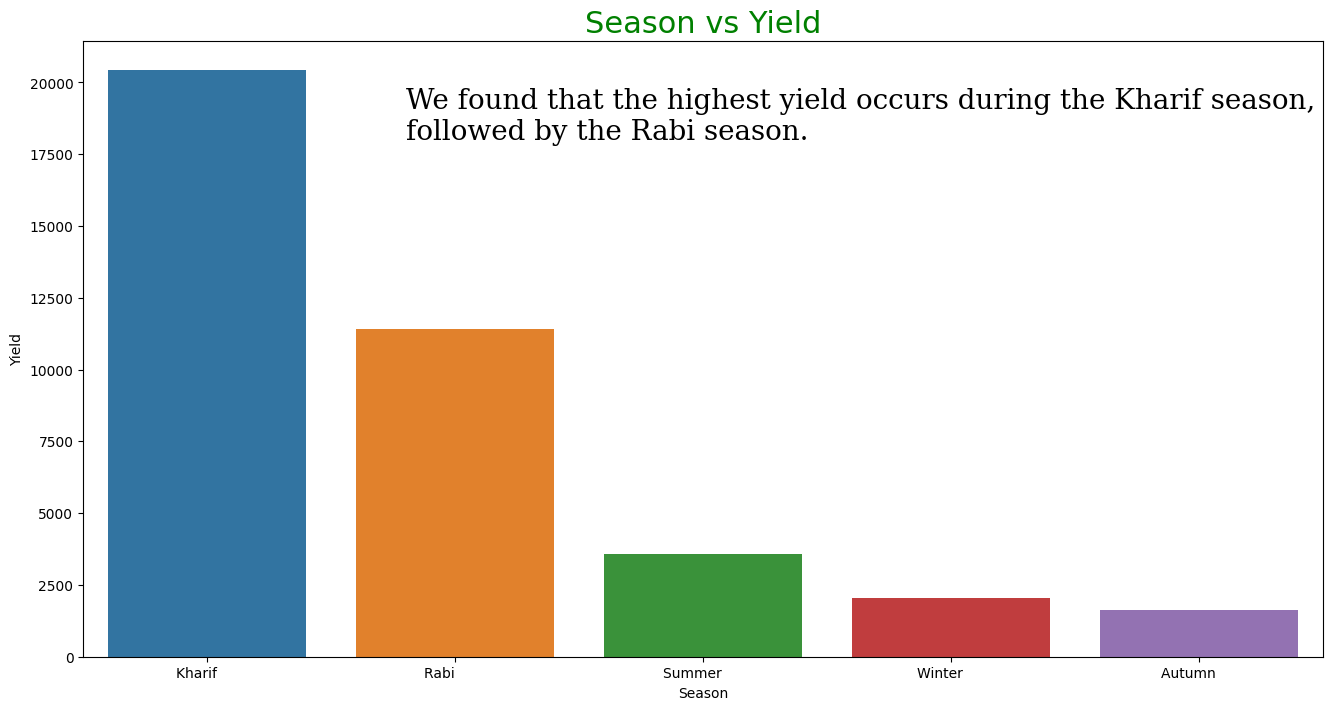

In [133]:
s=df.groupby('Season')['Yield'].sum().reset_index()
season=s['Yield'].sort_values(ascending=False).index[1:]
df_season=s.loc[season]
plt.figure(figsize=(16,8))
plt.title('Season vs Yield',color='green',fontsize=22)
sns.barplot(x='Season',y='Yield',data=df_season)
plt.text(0.8,18000,'''We found that the highest yield occurs during the Kharif season, 
followed by the Rabi season.''',fontsize=20, fontweight='light', fontfamily='serif')
plt.show()

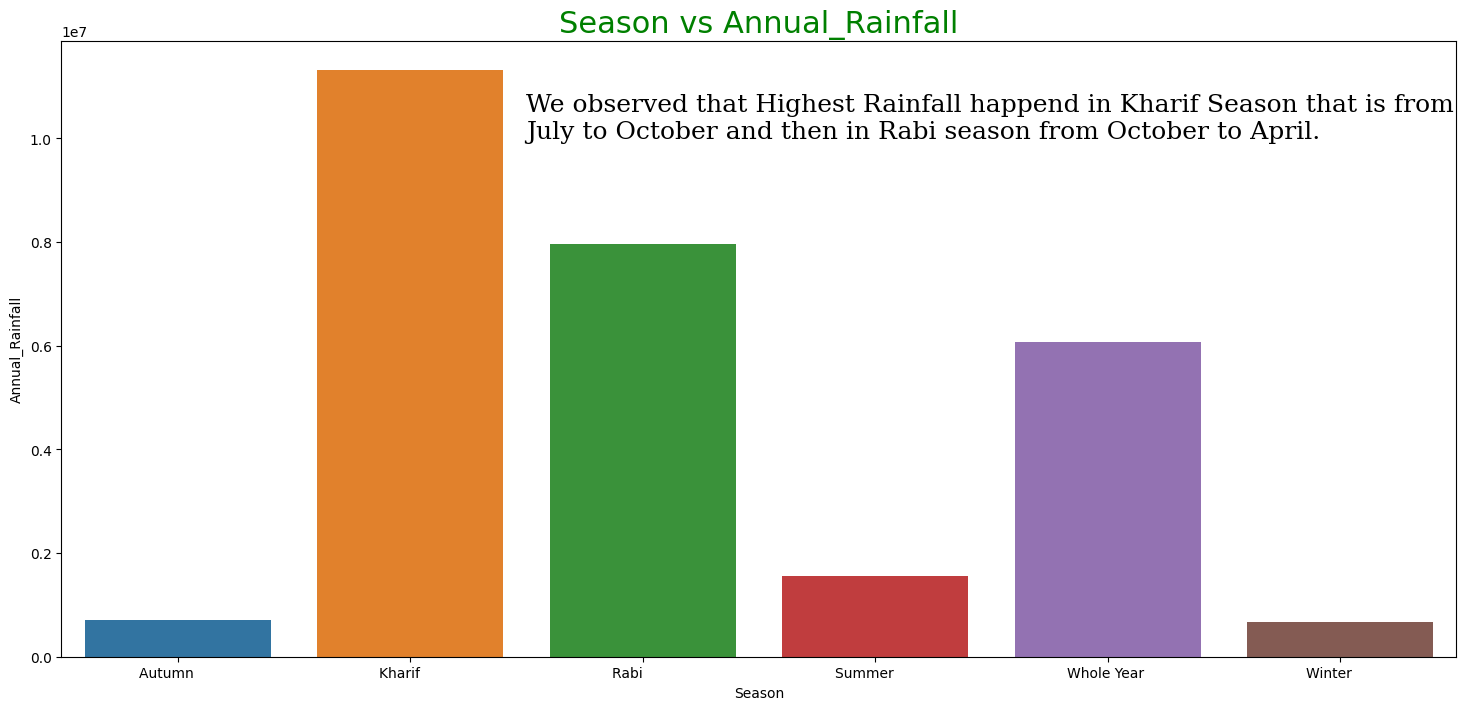

In [134]:
R=df.groupby('Season')['Annual_Rainfall'].sum().reset_index()
plt.figure(figsize=(18,8))
plt.title('Season vs Annual_Rainfall',color='green',fontsize=22)
sns.barplot(x='Season',y='Annual_Rainfall',data=R)
plt.text(1.5,10000000,'''We observed that Highest Rainfall happend in Kharif Season that is from 
July to October and then in Rabi season from October to April.''',fontsize=18, fontweight='light', fontfamily='serif')
plt.show()

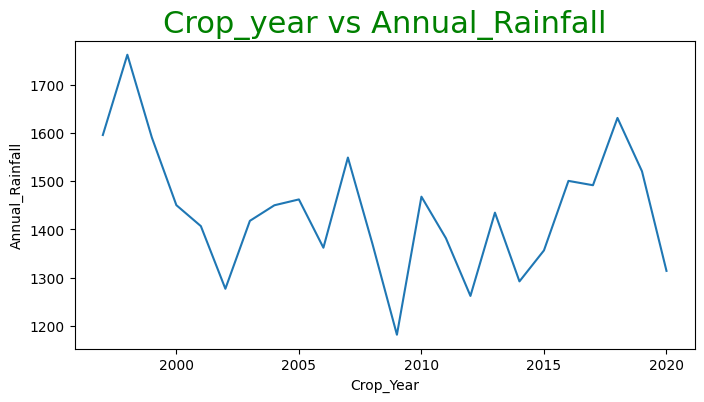

In [154]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Crop_Year',y='Annual_Rainfall',ci=None,data=df)
plt.title("Crop_year vs Annual_Rainfall",color='green',fontsize=22)
plt.show()

The plot indicates that the highest rainfall, approximately 2000mm, occurred around 1997, while the lowest rainfall was recorded around 2009 that is 1200mm.

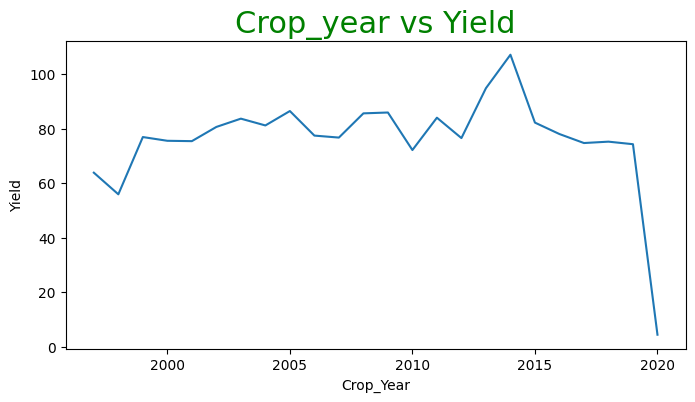

In [135]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Crop_Year',y='Yield',ci=None,data=df)
plt.title("Crop_year vs Yield",color='green',fontsize=22)
plt.show()

From above plot we observed that highest yeild occurs in the year 2014.

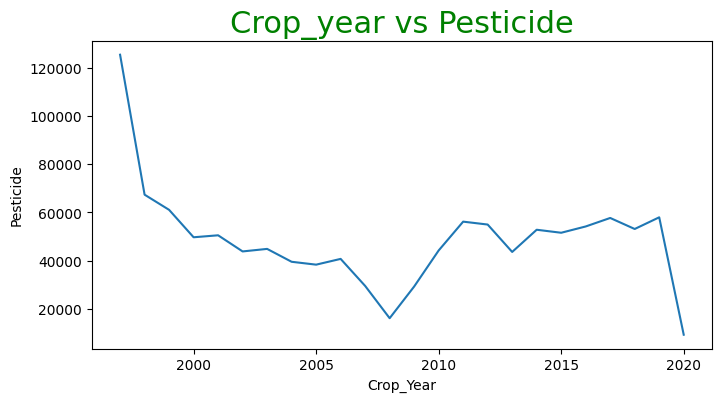

In [152]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Crop_Year',y='Pesticide',ci=None,data=df)
plt.title("Crop_year vs Pesticide",color='green',fontsize=22)
plt.show()

We observed a decline in pesticide usage up until around 2008, with a significant reduction in pesticide application for crops during that year. Afterward, there was an increase in pesticide use.

# Impact of Rain on the yield.

In [137]:
df['Rain_bin']=df['Annual_Rainfall'].apply(lambda x:'low' if x<=600 else("modrate" if x<=2000 else ('extreme')))
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Total_Yield,Rain_bin
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,4.185844e+09,extreme
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,3.109434e+07,extreme
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,1.751200e+04,extreme
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,2.494445e+12,extreme
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,1.380766e+06,extreme


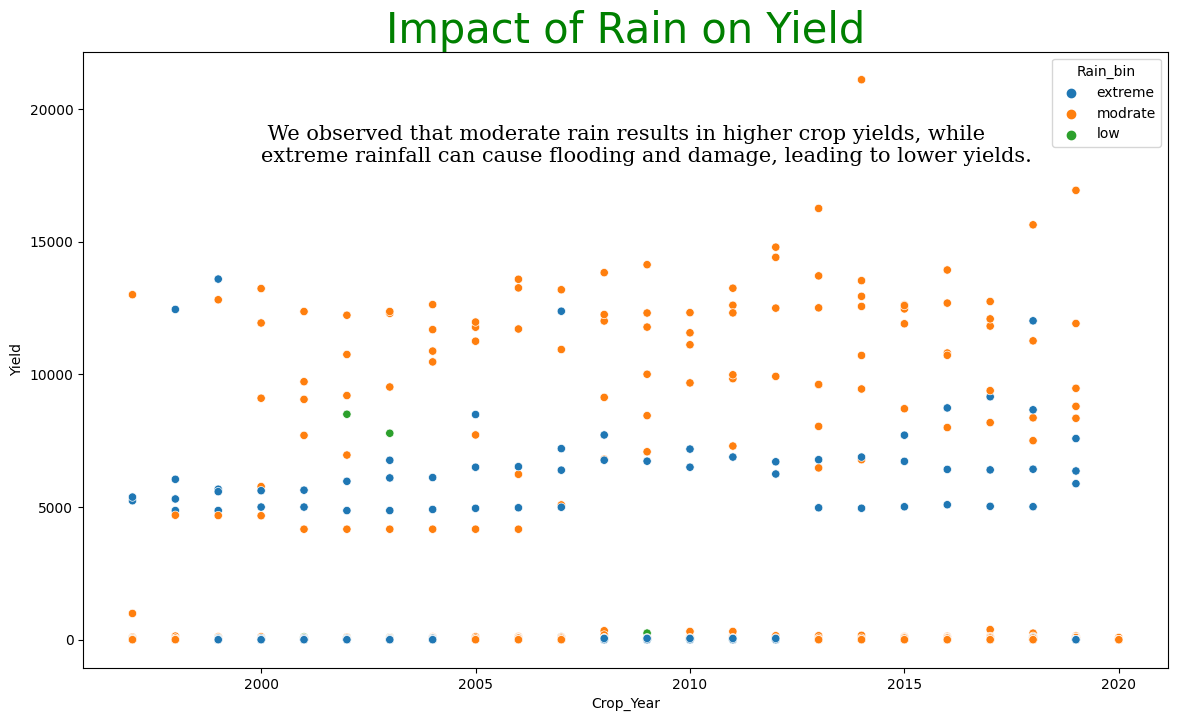

In [138]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Crop_Year',y='Yield',hue='Rain_bin',data=df)
plt.title("Impact of Rain on Yield",color='green',fontsize=30)
plt.text(2000,18000,''' We observed that moderate rain results in higher crop yields, while 
extreme rainfall can cause flooding and damage, leading to lower yields.''',fontsize=15, fontweight='light', fontfamily='serif')
plt.show()



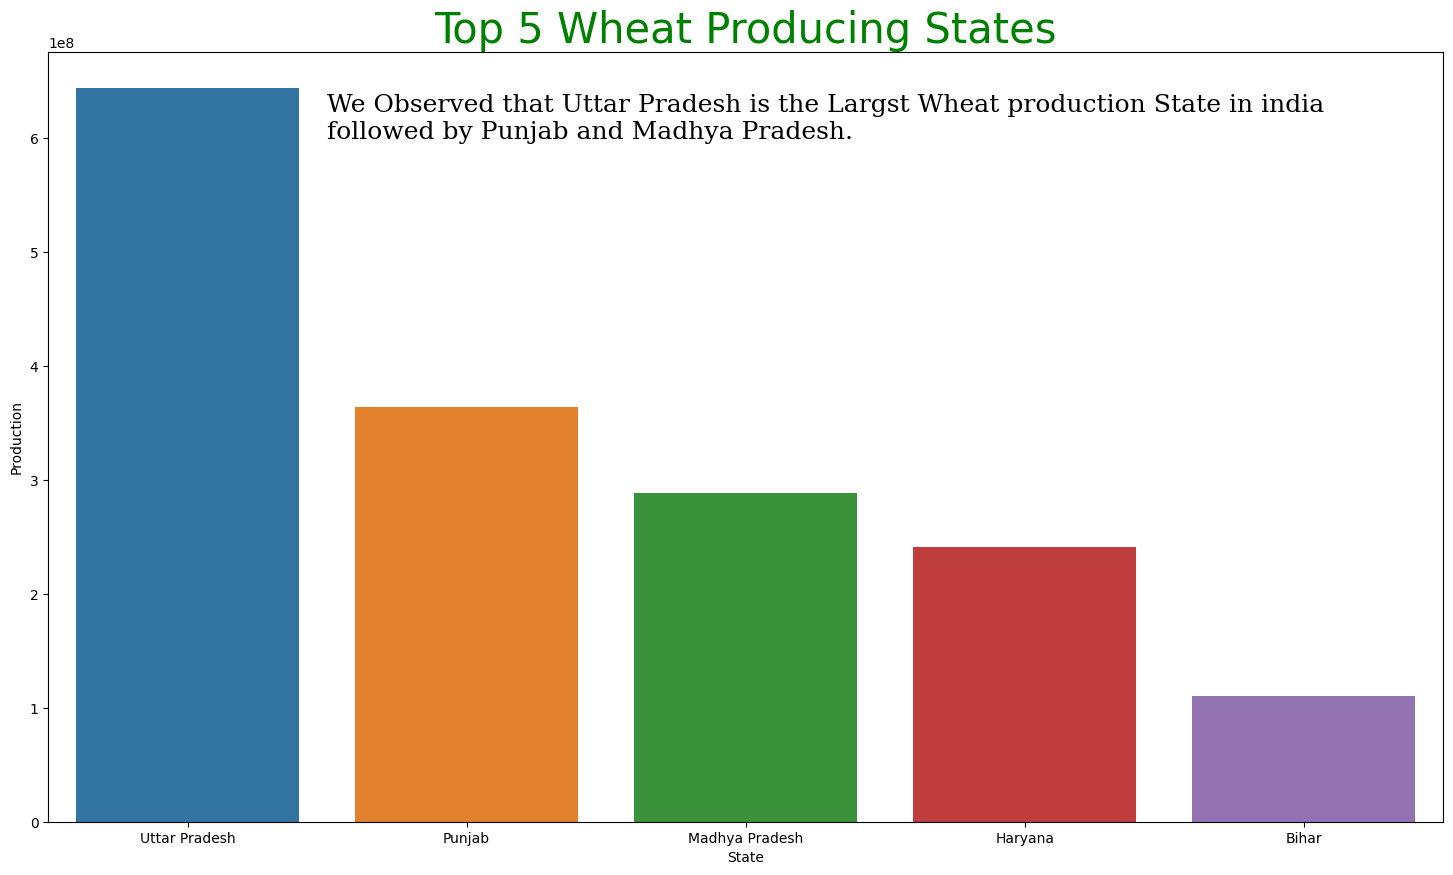

In [139]:
plt.figure(figsize=(18,10))
d=df[(df['Crop']=='Wheat')]
max=d.groupby(['State','Crop'])['Production'].sum().reset_index()
Top5=max['Production'].sort_values(ascending=False).index[:5]
Top_state=max.loc[Top5]
sns.barplot(x="State",y='Production',data=Top_state)
plt.title('Top 5 Wheat Producing States',color='green',fontsize=30)
plt.text(0.5,600000000,'''We Observed that Uttar Pradesh is the Largst Wheat production State in india
followed by Punjab and Madhya Pradesh.''',fontsize=18, fontweight='light', fontfamily='serif')
plt.show()

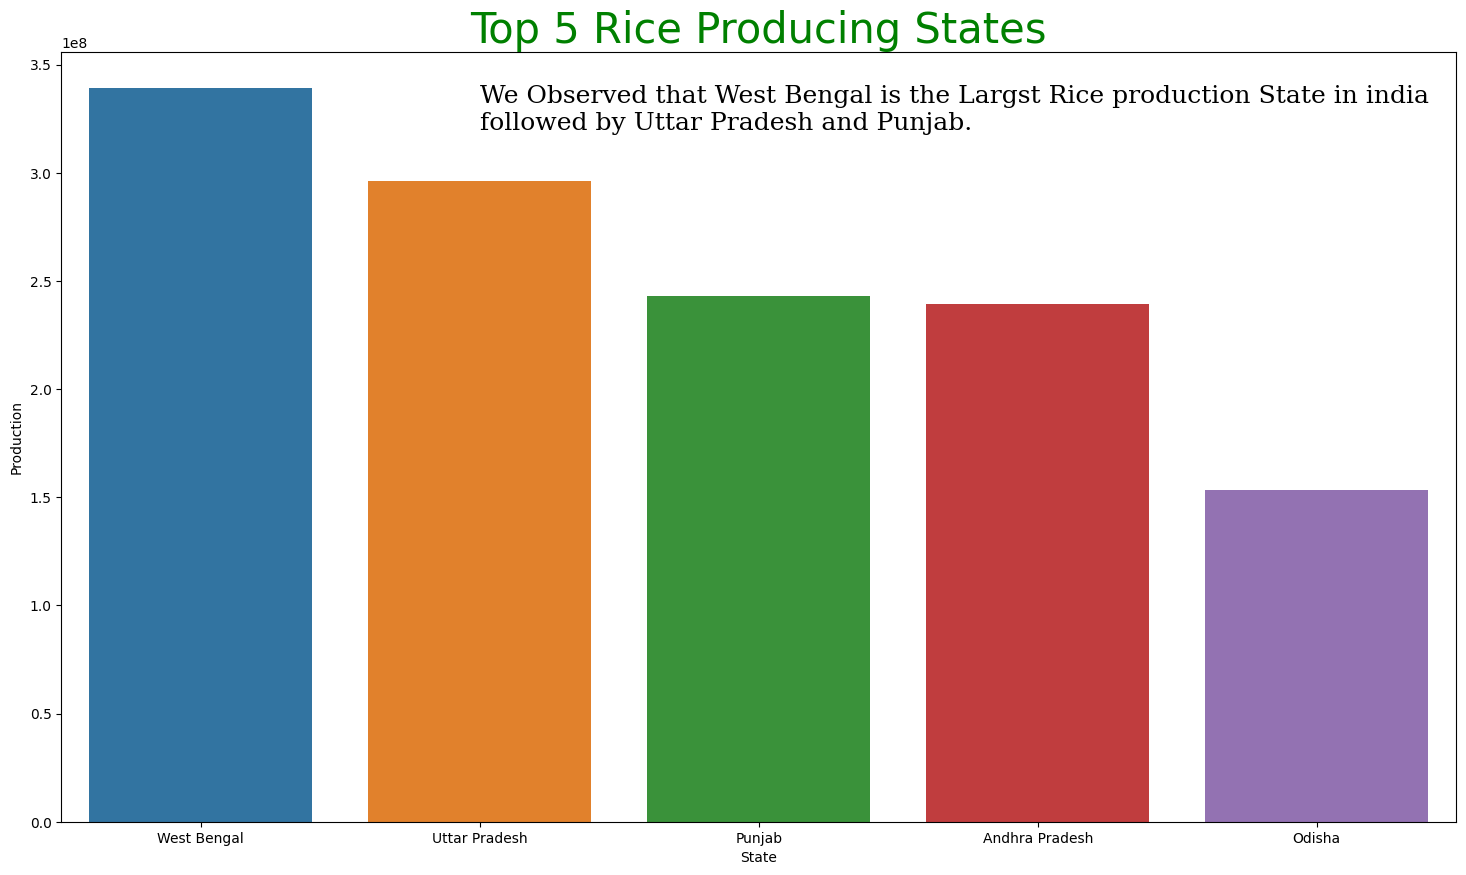

In [140]:
plt.figure(figsize=(18,10))
d=df.loc[df['Crop']=='Rice']
max=d.groupby('State')['Production'].sum().reset_index()
Top5=max['Production'].sort_values(ascending=False).index[:5]
Top_state=max.loc[Top5]
sns.barplot(x="State",y='Production',data=Top_state)
plt.title('Top 5 Rice Producing States',color='green',fontsize=30)
plt.text(1,320000000,'''We Observed that West Bengal is the Largst Rice production State in india
followed by Uttar Pradesh and Punjab.''',fontsize=18, fontweight='light', fontfamily='serif')
plt.show()

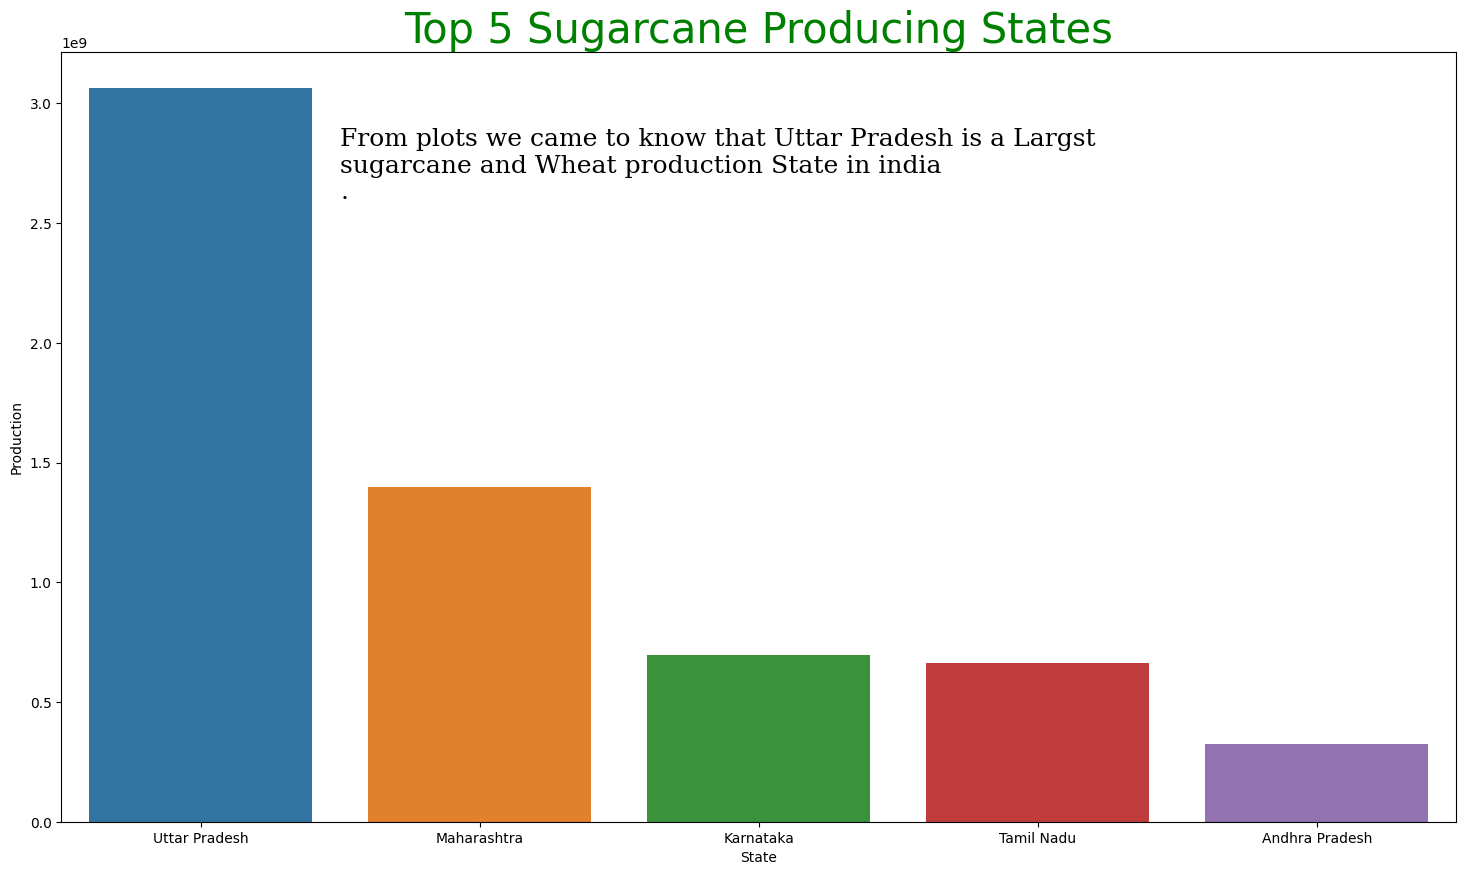

In [141]:
plt.figure(figsize=(18,10))
d=df.loc[df['Crop']=='Sugarcane']
max=d.groupby('State')['Production'].sum().reset_index()
Top5=max['Production'].sort_values(ascending=False).index[:5]
Top_state=max.loc[Top5]
sns.barplot(x="State",y='Production',data=Top_state)
plt.title('Top 5 Sugarcane Producing States',color='green',fontsize=30)
plt.text(0.5,2600000000,'''From plots we came to know that Uttar Pradesh is a Largst 
sugarcane and Wheat production State in india
.''',fontsize=18, fontweight='light', fontfamily='serif')
plt.show()


# Highest Crop Production:

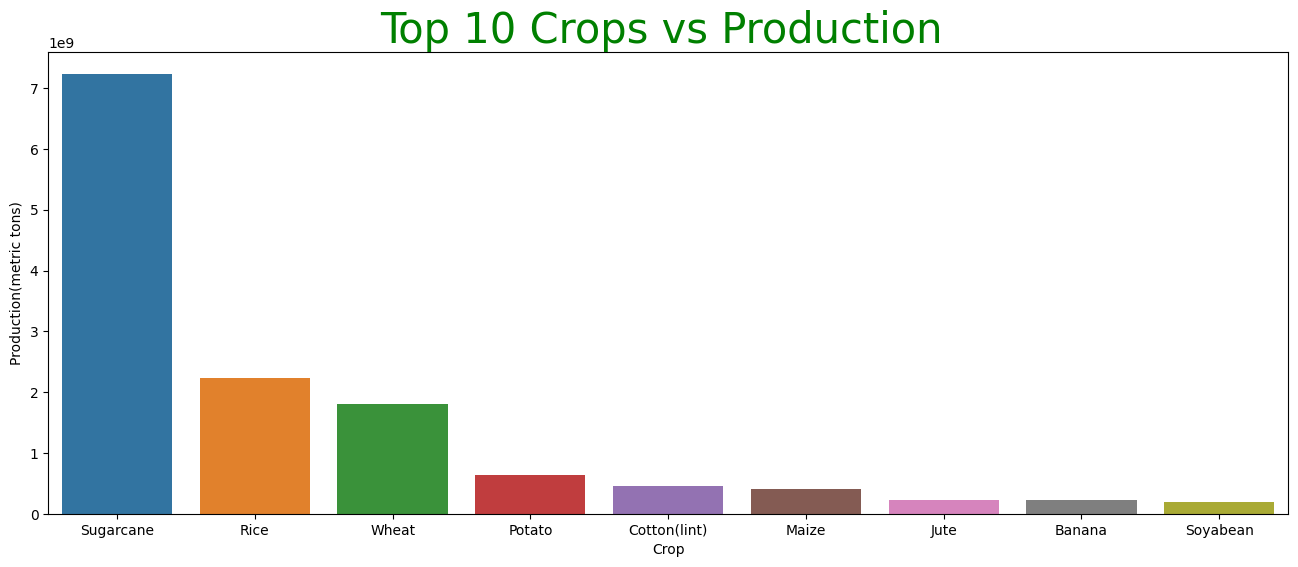

In [142]:
dt=df.groupby('Crop')['Production'].sum().reset_index()
top=dt['Production'].sort_values(ascending=False).index[1:10]
top10_crop=dt.loc[top]
plt.figure(figsize=(16,6))
sns.barplot(x='Crop',y='Production',data=top10_crop)
plt.ylabel("Production(metric tons)")
plt.title("Top 10 Crops vs Production ",color='green',fontsize=30)
plt.show()


# Corelation Matrix:

<Axes: >

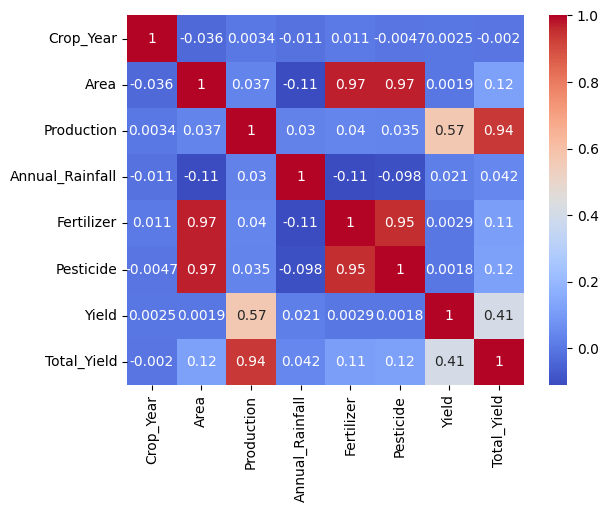

In [143]:
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm')

# Hypothesis Testing:

In [144]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Total_Yield,Rain_bin
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,4.185844e+09,extreme
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435,3.109434e+07,extreme
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333,1.751200e+04,extreme
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739,2.494445e+12,extreme
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909,1.380766e+06,extreme


In [145]:
from scipy.stats import pearsonr, spearmanr

# Area vs Fertilizer

H0: There is no linear relationship between the variable.

Ha: There is linear relationship between the variable.

Significance level(alpha)=0.05

In [146]:
pearsonr(df['Area'],df['Fertilizer'])

PearsonRResult(statistic=0.9732554116001877, pvalue=0.0)

p-value is less than alpha so we reject Null Hypothesis.

Therefore There is a linear relationship.

# Annual_Rainfall vs Yield

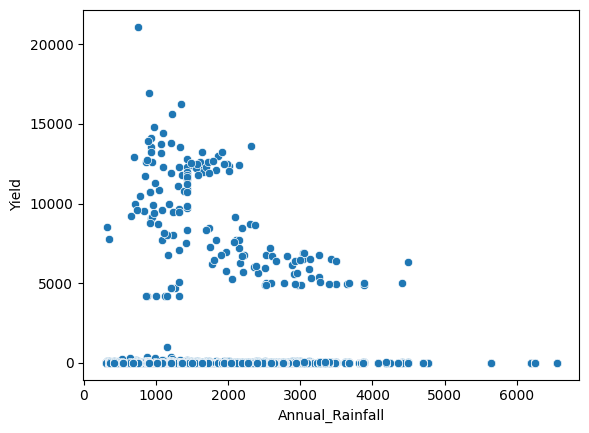

In [147]:
sns.scatterplot(x='Annual_Rainfall',y='Yield',data=df)
plt.show()

H0: There is no relationship between the variable.

Ha: There is relationship between the variable.

Significance level(alpha)=0.05

In [148]:
spearmanr(df['Annual_Rainfall'],df['Yield'])

SignificanceResult(statistic=0.046434280024973885, pvalue=7.094566868573686e-11)

p-value is less than alpha, so we reject Null hypothesis.

Therefore There is a relationship between the variable.

# Checking Distribution :

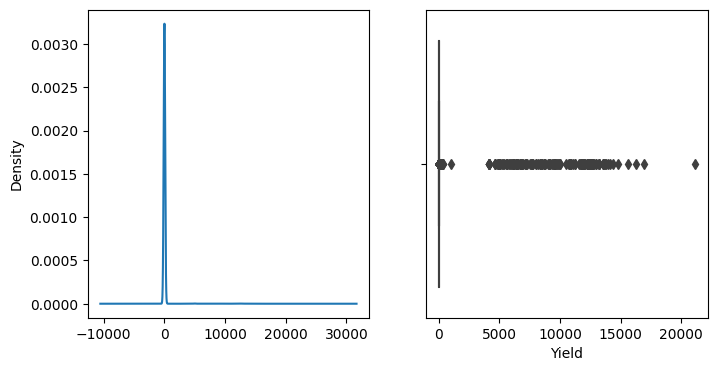

In [149]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
df['Yield'].plot(kind='density')
plt.subplot(1,2,2)
sns.boxplot(x='Yield',data=df)
plt.show()

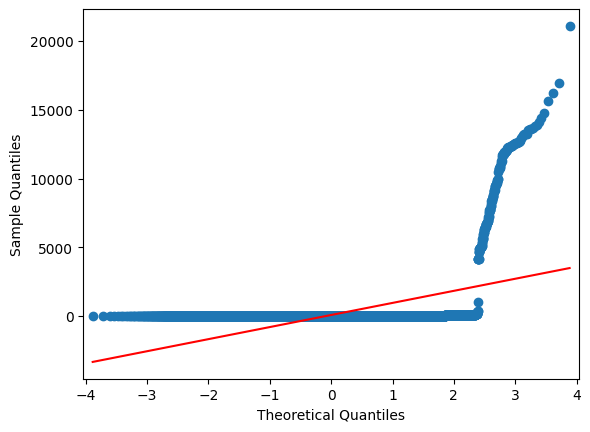

In [150]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df['Yield'], line="s")
plt.show()

In [151]:
from scipy.stats import shapiro
shapiro(df['Yield'])

ShapiroResult(statistic=0.06300851664279028, pvalue=1.777618133619245e-133)

p-value is less than alpha.

So We reject Null hypothesis, Therefore Data is not normally distributed.
